# Exploring the dataset

## CCMT Augmented Dataset

In [1]:
import os

import random
import shutil

from collections import Counter

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
root_dir = r'C:\Users\noush\Downloads\Dataset for Crop Pest and Disease Detection/CCMT Dataset-Augmented'

train_dir = root_dir + '/train_set'
test_dir = root_dir + '/test_set'

crop_names = [
    'Cashew',
    'Cassava',
    'Maize',
    'Tomato'
]

Crop: Cashew Total: 4 Diseased: 3
                    no. of images
Cashew_anthracnose           2572
Cashew_healthy               4674
Cashew_leaf miner            2822
Cashew_red rust              3662


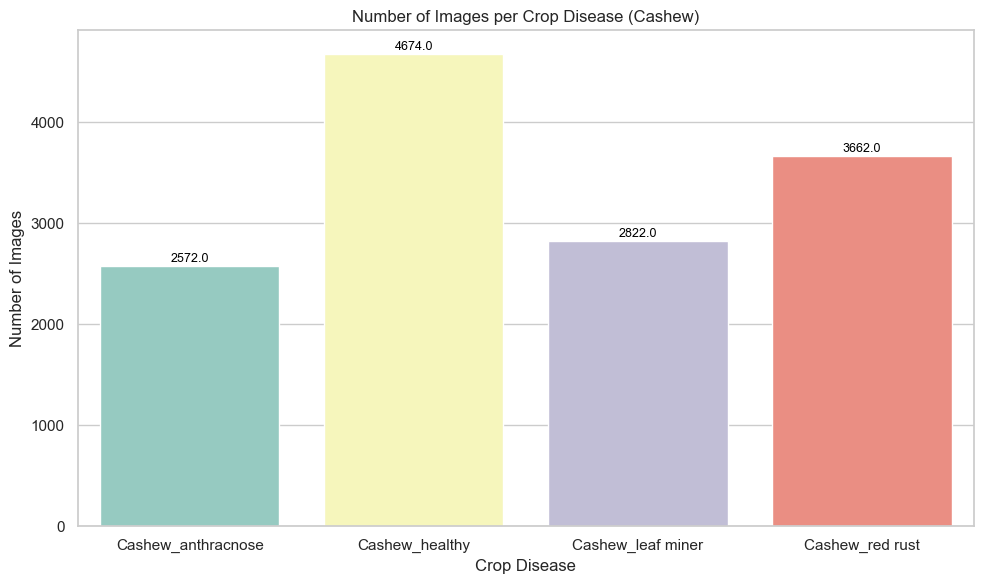

Crop: Cassava Total: 5 Diseased: 4
                          no. of images
Cassava_bacterial blight           7123
Cassava_brown spot                 2422
Cassava_green mite                 2397
Cassava_healthy                    1688
Cassava_mosaic                     1685


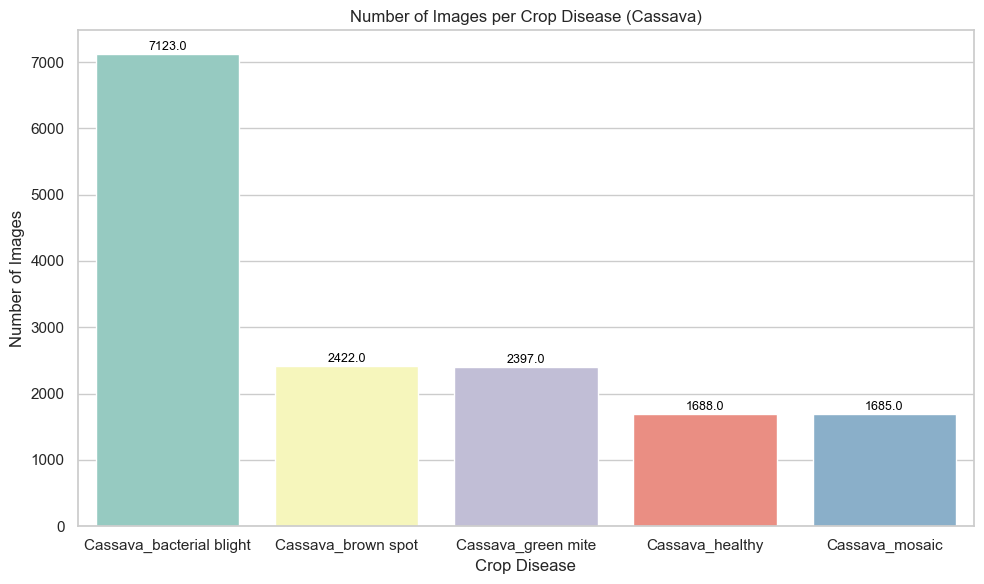

Crop: Maize Total: 4 Diseased: 3
                    no. of images
Maize_healthy                 649
Maize_leaf blight            3058
Maize_leaf spot              2176
Maize_streak virus           3117


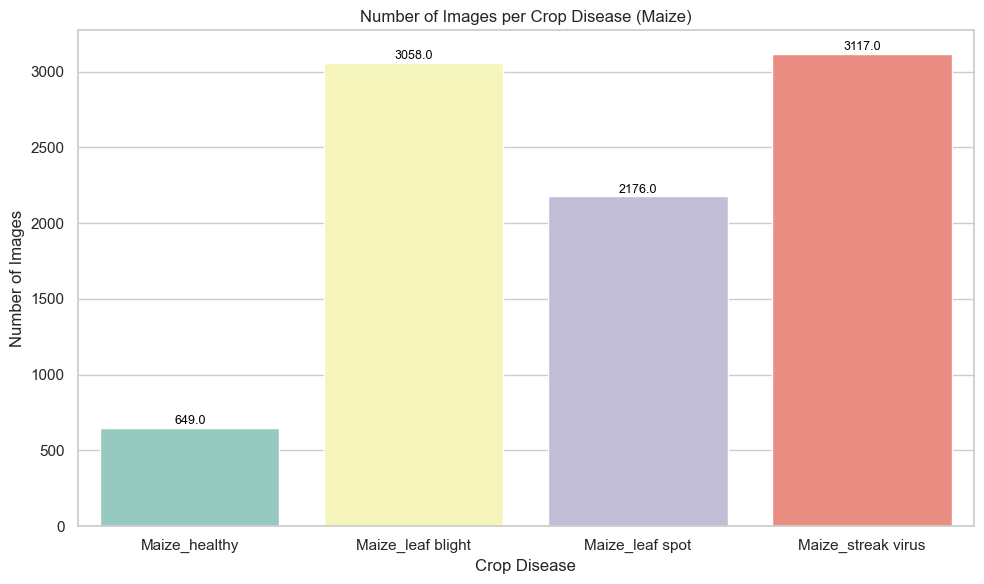

Crop: Tomato Total: 5 Diseased: 4
                           no. of images
Tomato_healthy                      1590
Tomato_leaf blight                  4149
Tomato_leaf curl                    1638
Tomato_septoria leaf spot           7468
Tomato_verticulium wilt             2081


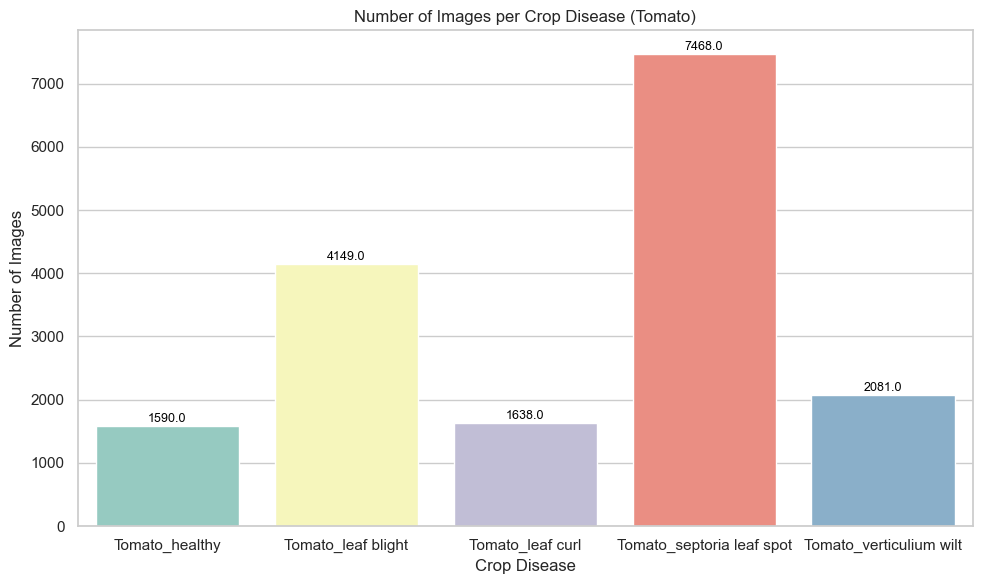

In [3]:
def analyze_crop(crop_name):
    crop_dir = os.path.join(train_dir, crop_name)

    disease = os.listdir(crop_dir)

    crop_info = {}
    for d in disease:
        name, status = d.split('_')
        if name in crop_info:
            crop_info[name]['total'] += 1
            if status != 'healthy':
                crop_info[name]['diseased'] += 1
        else:
            crop_info[name] = {'total': 1, 'diseased': 1 if status != 'healthy' else 0}

    for crop, stats in crop_info.items():
        print('Crop:', crop, 'Total:', stats['total'], 'Diseased:', stats['diseased'])

    img = Counter()

    for d in disease:
        num_images = len(os.listdir(os.path.join(crop_dir, d)))
        img[d] = num_images

    df = pd.DataFrame.from_dict(img, orient='index', columns=['no. of images'])
    print(df)

    sns.set(style='whitegrid', color_codes=True)

    plt.figure(figsize=(10, 6))

    ax = sns.barplot(x=df.index, y='no. of images', data=df, palette='Set3')

    plt.xlabel('Crop Disease')
    plt.ylabel('Number of Images')
    plt.title(f'Number of Images per Crop Disease ({crop_name})')
    plt.xticks()

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()

for crop_name in crop_names:
    analyze_crop(crop_name)

In [4]:
def calculate_total_images(crop_name, dataset_dir):
    crop_dir = os.path.join(dataset_dir, crop_name)
    total_images = 0

    if os.path.exists(crop_dir):
        for disease_class in os.listdir(crop_dir):
            disease_class_dir = os.path.join(crop_dir, disease_class)
            if os.path.isdir(disease_class_dir):
                total_images += len(os.listdir(disease_class_dir))

    return total_images

for crop_name in crop_names:
    total_images = calculate_total_images(crop_name, train_dir)
    
    print('Crop:', crop_name)
    print('Total Training Images:', total_images)
    print()

Crop: Cashew
Total Training Images: 13730

Crop: Cassava
Total Training Images: 15315

Crop: Maize
Total Training Images: 9000

Crop: Tomato
Total Training Images: 16926



Crop: Cashew Total: 4 Diseased: 3
                    no. of images
Cashew_anthracnose           1477
Cashew_healthy               1101
Cashew_leaf miner            1221
Cashew_red rust              1479


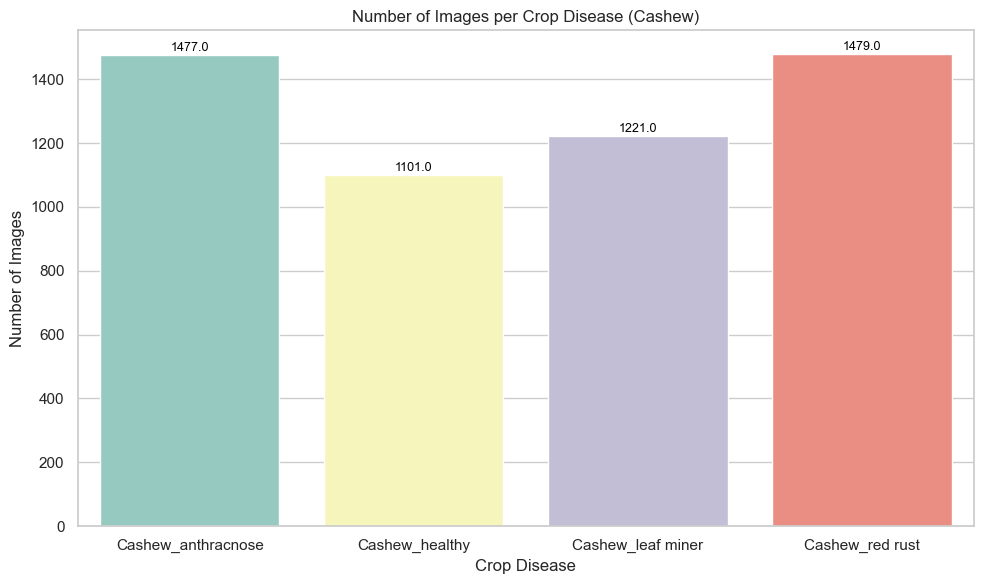

Crop: Cassava Total: 5 Diseased: 4
                          no. of images
Cassava_bacterial blight           1936
Cassava_brown spot                 1082
Cassava_green mite                  747
Cassava_healthy                     916
Cassava_mosaic                      879


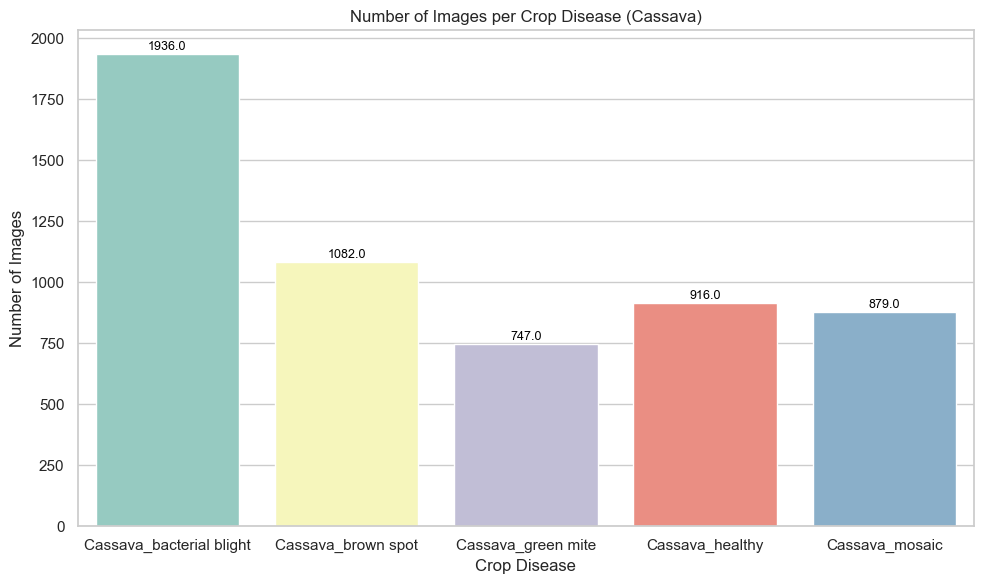

Crop: Maize Total: 4 Diseased: 3
                    no. of images
Maize_healthy                 129
Maize_leaf blight             621
Maize_leaf spot               783
Maize_streak virus            624


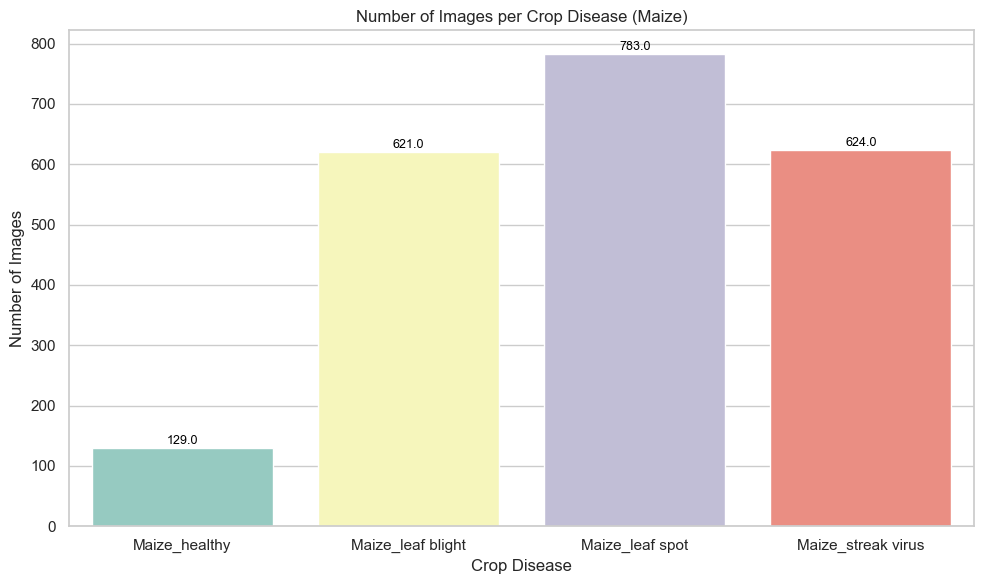

Crop: Tomato Total: 5 Diseased: 4
                           no. of images
Tomato_healthy                       406
Tomato_leaf blight                  1309
Tomato_leaf curl                     402
Tomato_septoria leaf spot           2133
Tomato_verticulium wilt             1015


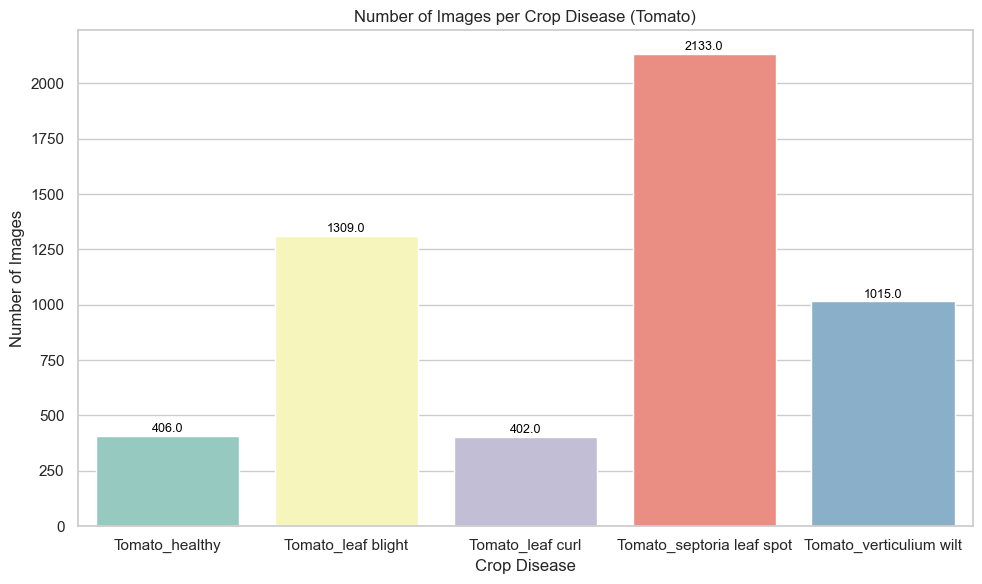

In [5]:
def analyze_crop(crop_name):
    crop_dir = os.path.join(test_dir, crop_name)

    disease = os.listdir(crop_dir)

    crop_info = {}
    for d in disease:
        name, status = d.split('_')
        if name in crop_info:
            crop_info[name]['total'] += 1
            if status != 'healthy':
                crop_info[name]['diseased'] += 1
        else:
            crop_info[name] = {'total': 1, 'diseased': 1 if status != 'healthy' else 0}

    for crop, stats in crop_info.items():
        print('Crop:', crop, 'Total:', stats['total'], 'Diseased:', stats['diseased'])

    img = Counter()

    for d in disease:
        num_images = len(os.listdir(os.path.join(crop_dir, d)))
        img[d] = num_images

    df = pd.DataFrame.from_dict(img, orient='index', columns=['no. of images'])
    print(df)

    sns.set(style='whitegrid', color_codes=True)

    plt.figure(figsize=(10, 6))

    ax = sns.barplot(x=df.index, y='no. of images', data=df, palette='Set3')

    plt.xlabel('Crop Disease')
    plt.ylabel('Number of Images')
    plt.title(f'Number of Images per Crop Disease ({crop_name})')
    plt.xticks()

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()

for crop_name in crop_names:
    analyze_crop(crop_name)

In [6]:
def calculate_total_images(crop_name, dataset_dir):
    crop_dir = os.path.join(dataset_dir, crop_name)
    total_images = 0

    if os.path.exists(crop_dir):
        for disease_class in os.listdir(crop_dir):
            disease_class_dir = os.path.join(crop_dir, disease_class)
            if os.path.isdir(disease_class_dir):
                total_images += len(os.listdir(disease_class_dir))

    return total_images

for crop_name in crop_names:
    total_images = calculate_total_images(crop_name, test_dir)
    
    print('Crop:', crop_name)
    print('Total Testing Images:', total_images)
    print()

Crop: Cashew
Total Testing Images: 5278

Crop: Cassava
Total Testing Images: 5560

Crop: Maize
Total Testing Images: 2157

Crop: Tomato
Total Testing Images: 5265



# Deep Learning Models

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.optimizers import Adam

from sklearn.utils.class_weight import compute_class_weight

In [8]:
tf.config.threading.set_intra_op_parallelism_threads(6)
tf.config.threading.set_inter_op_parallelism_threads(6)

## CNN

In [9]:
batch_size = 64
img_size = 224
epoch = 10

In [10]:
# Data preprocessing
train_datagen = ImageDataGenerator(rescale = 1.0 / 255)
test_datagen = ImageDataGenerator(rescale = 1.0 / 255)

### Maize

In [11]:
maize = 'Maize'
maize_train_dir = os.path.join(train_dir, maize)
maize_test_dir = os.path.join(test_dir, maize)

In [12]:
maize_train_gen = train_datagen.flow_from_directory(
    maize_train_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True,
    seed = 42
)

Found 9000 images belonging to 4 classes.


In [13]:
maize_test_gen = test_datagen.flow_from_directory(
    maize_test_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False,
    seed = 42
)

Found 2157 images belonging to 4 classes.


In [14]:
# Get class indices from train_generator.class_indices
maize_indices = maize_train_gen.class_indices

# Calculate class weights based on class_indices
maize_weights = compute_class_weight('balanced', classes = np.unique(maize_train_gen.classes), y = maize_train_gen.classes)
maize_weights_dict = {class_index: weight for class_index, weight in zip(maize_indices.values(), maize_weights)}
maize_weights_dict

{0: 3.4668721109399074,
 1: 0.7357750163505559,
 2: 1.0340073529411764,
 3: 0.7218479307025987}

In [15]:
# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (img_size, img_size, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same',))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(len(maize_train_gen.class_indices), activation = 'softmax'))

model.compile(
    optimizer = Adam(learning_rate = 0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                   

In [16]:
history_maize = model.fit(
    maize_train_gen,
    steps_per_epoch = maize_train_gen.samples // batch_size,
    epochs = epoch,
    validation_data = maize_test_gen,
    validation_steps = maize_test_gen.samples // batch_size,
    class_weight = maize_weights_dict,
    )

Epoch 1/10
140/140 [==============================] - 1460s 10s/step - loss: 1.1827 - accuracy: 0.3884 - val_loss: 1.2264 - val_accuracy: 0.4413
Epoch 2/10
140/140 [==============================] - 1407s 10s/step - loss: 0.9786 - accuracy: 0.5270 - val_loss: 1.0528 - val_accuracy: 0.5204
Epoch 3/10
140/140 [==============================] - 1401s 10s/step - loss: 0.8656 - accuracy: 0.6092 - val_loss: 1.0654 - val_accuracy: 0.5038
Epoch 4/10
140/140 [==============================] - 1395s 10s/step - loss: 0.8000 - accuracy: 0.6407 - val_loss: 0.9828 - val_accuracy: 0.5563
Epoch 5/10
140/140 [==============================] - 1411s 10s/step - loss: 0.7567 - accuracy: 0.6642 - val_loss: 0.8408 - val_accuracy: 0.6151
Epoch 6/10
140/140 [==============================] - 1586s 11s/step - loss: 0.7098 - accuracy: 0.6854 - val_loss: 0.9422 - val_accuracy: 0.5999
Epoch 7/10
140/140 [==============================] - 1587s 11s/step - loss: 0.6652 - accuracy: 0.6993 - val_loss: 0.7405 - val_ac

In [17]:
from tensorflow.keras.models import load_model
# Save the model to a file
model.save("maize_disease_detection_model.h5")

C:\Users\noush\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Result

In [29]:
from tensorflow.keras.models import load_model

loaded_model = load_model("maize_disease_detection_model.h5")

In [ ]:
from sklearn.metrics import classification_report

testing_predictions_maize = model.predict(maize_test_gen)
testing_pred_labels_maize = np.argmax(testing_predictions_maize, axis=1)
testing_true_labels_maize = maize_test_gen.classes

training_report_maize = classification_report(training_true_labels_maize, training_pred_labels_maize, target_names=maize_train_gen.class_indices.keys())
testing_report_maize = classification_report(testing_true_labels_maize, testing_pred_labels_maize, target_names=maize_train_gen.class_indices.keys())

In [49]:
print("Testing Precision and Recall for Maize:\n", testing_report_maize)

Testing Precision and Recall for Maize:
                     precision    recall  f1-score   support

     Maize_healthy       0.49      0.94      0.64       129
 Maize_leaf blight       0.80      0.56      0.65       621
   Maize_leaf spot       0.62      0.63      0.62       783
Maize_streak virus       0.80      0.86      0.83       624

          accuracy                           0.69      2157
         macro avg       0.67      0.75      0.69      2157
      weighted avg       0.71      0.69      0.69      2157



In [51]:
from sklearn.metrics import accuracy_score

testing_accuracy_maize = accuracy_score(testing_true_labels_maize, testing_pred_labels_maize)
testing_accuracy_maize_percent = testing_accuracy_maize * 100

print(f"Testing Accuracy for Maize: {testing_accuracy_maize_percent:.2f}%")

Testing Accuracy for Maize: 69.45%


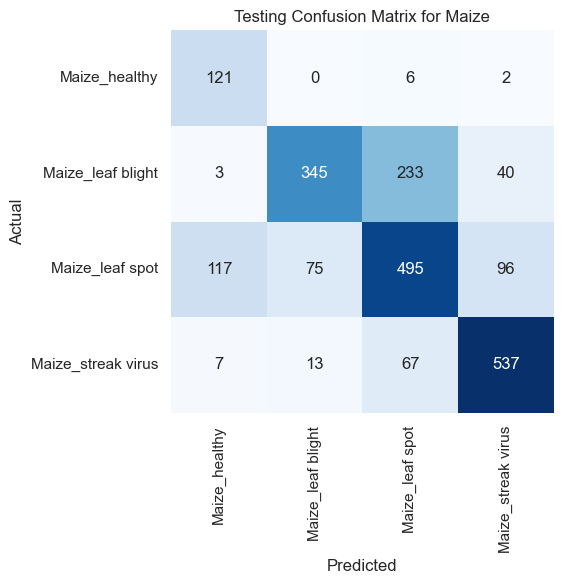

In [50]:
from sklearn.metrics import confusion_matrix

testing_confusion_matrix_maize = confusion_matrix(testing_true_labels_maize, testing_pred_labels_maize)

plt.figure(figsize=(12, 6))

sns.heatmap(testing_confusion_matrix_maize, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=maize_test_gen.class_indices.keys(),
            yticklabels=maize_test_gen.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Testing Confusion Matrix for Maize')

plt.tight_layout()
plt.show()

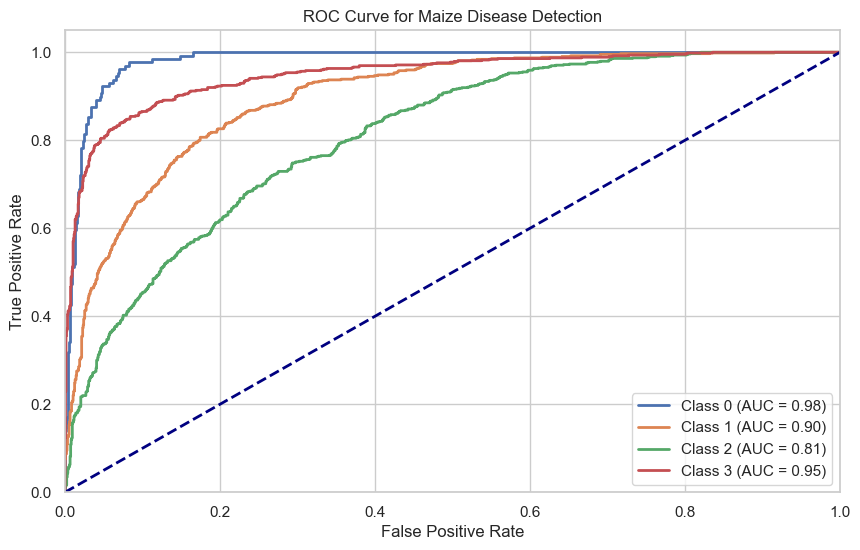

In [36]:
from sklearn.metrics import roc_curve, auc

n_classes_maize = len(maize_test_gen.class_indices)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes_maize):
    fpr[i], tpr[i], _ = roc_curve(testing_true_labels_maize, testing_predictions_maize[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))

for i in range(n_classes_maize):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Maize Disease Detection')
plt.legend(loc='lower right')
plt.show()

### Cashew

In [21]:
cashew = 'Cashew'  
cashew_train_dir = os.path.join(train_dir, cashew)
cashew_test_dir = os.path.join(test_dir, cashew)

cashew_train_gen = train_datagen.flow_from_directory(
    cashew_train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
)
cashew_test_gen = test_datagen.flow_from_directory(
    cashew_test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

Found 13730 images belonging to 4 classes.
Found 5278 images belonging to 4 classes.


In [22]:
cashew_indices = cashew_train_gen.class_indices

cashew_weights = compute_class_weight('balanced', classes=np.unique(cashew_train_gen.classes), y=cashew_train_gen.classes)
cashew_weights_dict = {class_index: weight for class_index, weight in zip(cashew_indices.values(), cashew_weights)}
cashew_weights_dict

{0: 1.3345645412130638,
 1: 0.7343816859221224,
 2: 1.2163359319631466,
 3: 0.9373293282359366}

In [22]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_size, img_size, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D((3, 3)))

model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D((3, 3)))

model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D((3, 3)))

model1.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

model1.add(Flatten())

model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(len(cashew_train_gen.class_indices), activation='softmax'))

model1.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 74, 74, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                 

In [23]:
history_cashew = model1.fit(
    cashew_train_gen,
    steps_per_epoch=cashew_train_gen.samples // batch_size,
    epochs=epoch,
    validation_data=cashew_test_gen,
    validation_steps=cashew_test_gen.samples // batch_size,
    class_weight=cashew_weights_dict,
)

Epoch 1/10
214/214 [==============================] - 2621s 12s/step - loss: 1.1212 - accuracy: 0.4870 - val_loss: 0.9473 - val_accuracy: 0.5774
Epoch 2/10
214/214 [==============================] - 2260s 11s/step - loss: 0.8711 - accuracy: 0.6341 - val_loss: 0.7738 - val_accuracy: 0.6860
Epoch 3/10
214/214 [==============================] - 2221s 10s/step - loss: 0.6655 - accuracy: 0.7393 - val_loss: 0.6018 - val_accuracy: 0.7641
Epoch 4/10
214/214 [==============================] - 2436s 11s/step - loss: 0.5270 - accuracy: 0.8053 - val_loss: 0.4517 - val_accuracy: 0.8249
Epoch 5/10
214/214 [==============================] - 2447s 11s/step - loss: 0.4695 - accuracy: 0.8332 - val_loss: 0.4364 - val_accuracy: 0.8342
Epoch 6/10
214/214 [==============================] - 2377s 11s/step - loss: 0.4193 - accuracy: 0.8519 - val_loss: 0.4215 - val_accuracy: 0.8415
Epoch 7/10
214/214 [==============================] - 2208s 10s/step - loss: 0.3707 - accuracy: 0.8687 - val_loss: 0.3928 - val_ac

In [37]:
model1.save("cashew_disease_detection_model.h5")

C:\Users\noush\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Result

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model("cashew_disease_detection_model.h5")

In [ ]:
testing_predictions = model1.predict(cashew_test_gen)
testing_pred_labels = np.argmax(testing_predictions, axis=1)
testing_true_labels = cashew_test_gen.classes

training_report = classification_report(training_true_labels, training_pred_labels, target_names=cashew_train_gen.class_indices.keys())
testing_report = classification_report(testing_true_labels, testing_pred_labels, target_names=cashew_train_gen.class_indices.keys())

In [47]:
print("Testing Precision and Recall:\n", testing_report)

Testing Precision and Recall:
                     precision    recall  f1-score   support

Cashew_anthracnose       0.83      0.61      0.70      1477
    Cashew_healthy       0.66      0.96      0.78      1101
 Cashew_leaf miner       0.87      0.82      0.84      1221
   Cashew_red rust       0.96      0.95      0.96      1479

          accuracy                           0.82      5278
         macro avg       0.83      0.83      0.82      5278
      weighted avg       0.84      0.82      0.82      5278



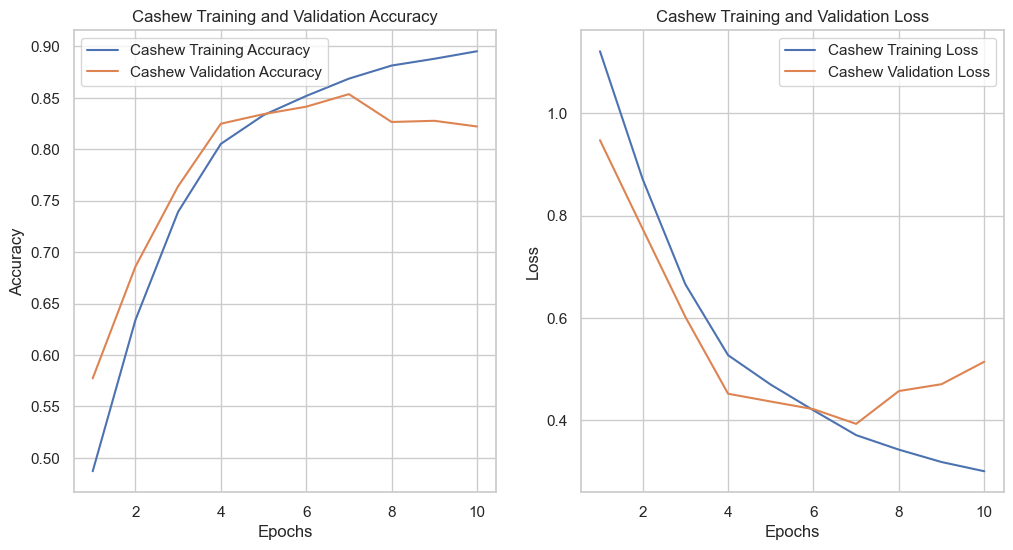

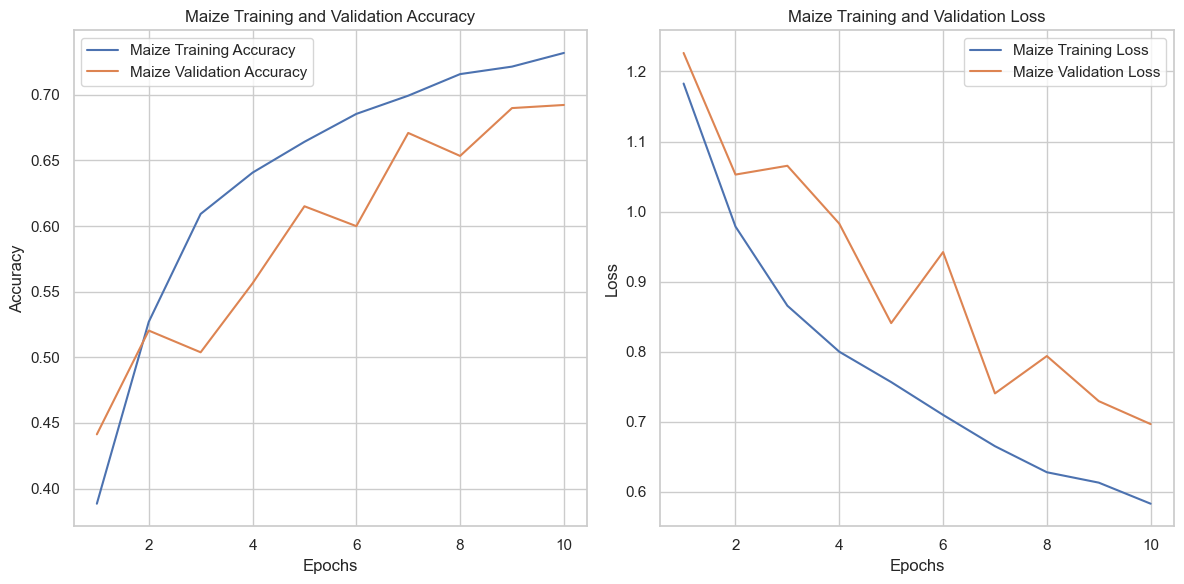

In [26]:
training_accuracy_maize = history_maize.history['accuracy']
validation_accuracy_maize = history_maize.history['val_accuracy']
training_loss_maize = history_maize.history['loss']
validation_loss_maize = history_maize.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, epoch + 1), training_accuracy, label='Cashew Training Accuracy')
plt.plot(range(1, epoch + 1), validation_accuracy, label='Cashew Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Cashew Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epoch + 1), training_loss, label='Cashew Training Loss')
plt.plot(range(1, epoch + 1), validation_loss, label='Cashew Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cashew Training and Validation Loss')
plt.legend()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, epoch + 1), training_accuracy_maize, label='Maize Training Accuracy')
plt.plot(range(1, epoch + 1), validation_accuracy_maize, label='Maize Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Maize Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epoch + 1), training_loss_maize, label='Maize Training Loss')
plt.plot(range(1, epoch + 1), validation_loss_maize, label='Maize Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Maize Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

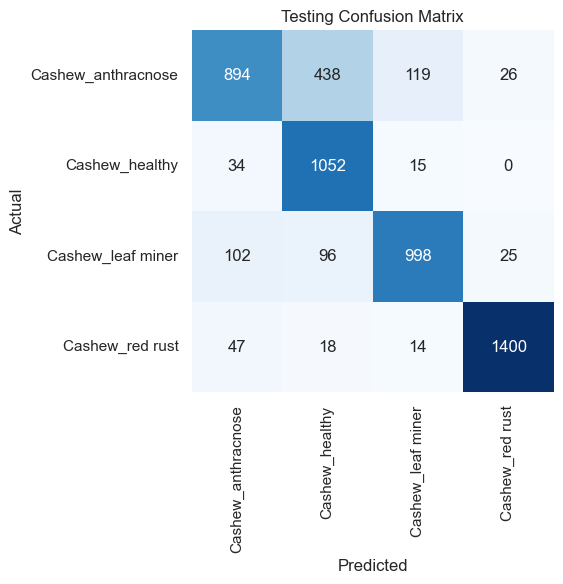

In [48]:
testing_confusion_matrix = confusion_matrix(testing_true_labels, testing_pred_labels)
plt.figure(figsize=(12, 6))

sns.heatmap(testing_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=cashew_test_gen.class_indices.keys(),
            yticklabels=cashew_test_gen.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Testing Confusion Matrix')

plt.tight_layout()
plt.show()

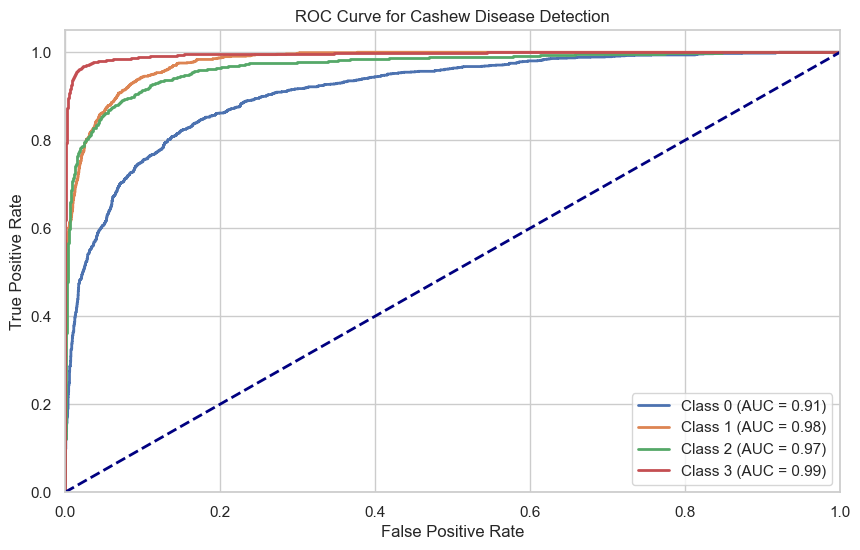

In [35]:
from sklearn.metrics import roc_curve, auc

# Get the number of classes
n_classes_cashew = len(cashew_test_gen.class_indices)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes_cashew):
    fpr[i], tpr[i], _ = roc_curve(testing_true_labels, testing_predictions[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))

for i in range(n_classes_cashew):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cashew Disease Detection')
plt.legend(loc='lower right')
plt.show()

## VGG16

In [23]:
vgg = VGG16(input_shape = (img_size, img_size, 3), weights = 'imagenet', include_top = False)
# Freeze the layers of the pre-trained VGG16
vgg.trainable = False

In [24]:
x = Flatten()(vgg.output)
predictions = Dense(len(cashew_train_gen.class_indices), activation='softmax')(x)

cashew_vgg = Model(inputs=vgg.input, outputs=predictions)

cashew_vgg.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
cashew_vgg.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [27]:
cashew_history = cashew_vgg.fit(
    cashew_train_gen,
    steps_per_epoch=cashew_train_gen.samples // batch_size,
    epochs=5,
    validation_data=cashew_test_gen,
    validation_steps=cashew_test_gen.samples // batch_size,
    class_weight=cashew_weights_dict,
)

Epoch 1/5
214/214 [==============================] - 8926s 42s/step - loss: 0.8420 - accuracy: 0.6890 - val_loss: 0.6867 - val_accuracy: 0.7422
Epoch 2/5
214/214 [==============================] - 11051s 52s/step - loss: 0.5699 - accuracy: 0.8150 - val_loss: 0.5726 - val_accuracy: 0.7915
Epoch 3/5
214/214 [==============================] - 11285s 53s/step - loss: 0.4765 - accuracy: 0.8497 - val_loss: 0.5574 - val_accuracy: 0.7864
Epoch 4/5
214/214 [==============================] - 10299s 48s/step - loss: 0.4169 - accuracy: 0.8782 - val_loss: 0.5066 - val_accuracy: 0.8085
Epoch 5/5
214/214 [==============================] - 10472s 49s/step - loss: 0.3746 - accuracy: 0.8945 - val_loss: 0.4693 - val_accuracy: 0.8260


#### Result

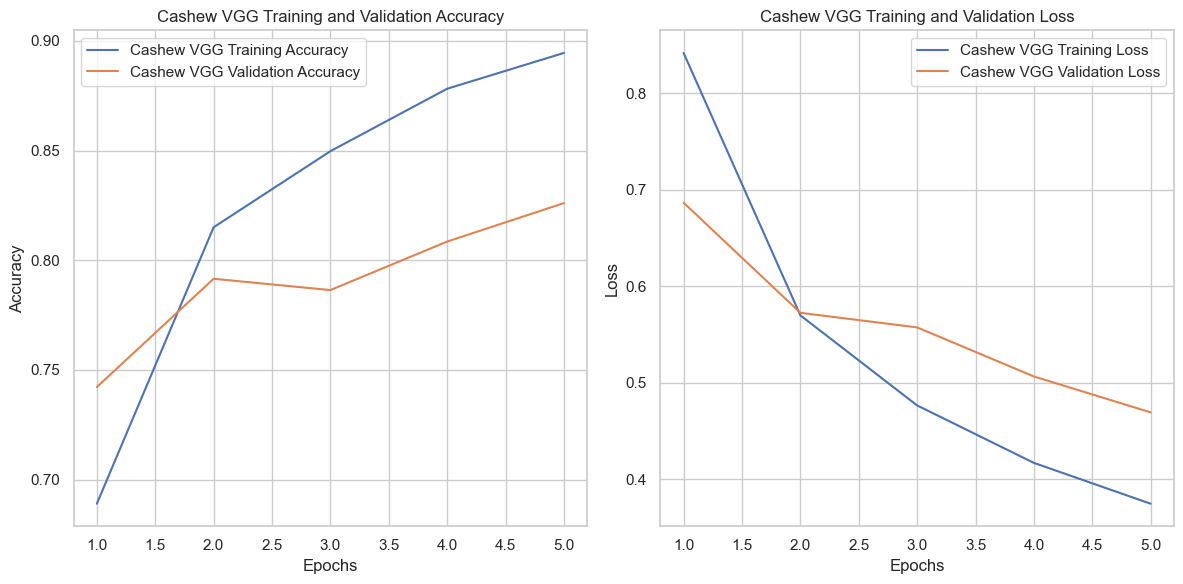

In [39]:
training_accuracy_cashew = cashew_history.history['accuracy']
validation_accuracy_cashew = cashew_history.history['val_accuracy']
training_loss_cashew = cashew_history.history['loss']
validation_loss_cashew = cashew_history.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 6), training_accuracy_cashew, label='Cashew VGG Training Accuracy')
plt.plot(range(1, 6), validation_accuracy_cashew, label='Cashew VGG Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Cashew VGG Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 6), training_loss_cashew, label='Cashew VGG Training Loss')
plt.plot(range(1, 6), validation_loss_cashew, label='Cashew VGG Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cashew VGG Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

83/83 [==============================] - 3158s 38s/step


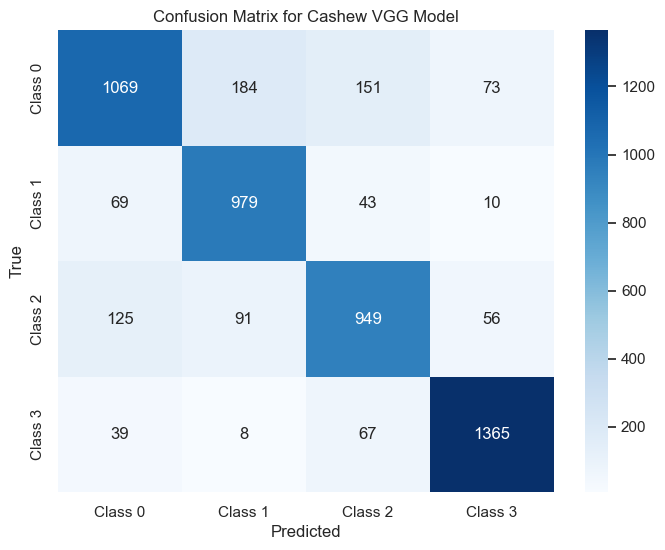

In [28]:
from sklearn.metrics import confusion_matrix

predictions_cashew = cashew_vgg.predict(cashew_test_gen)

true_labels_cashew = cashew_test_gen.classes

predicted_labels_cashew = predictions_cashew.argmax(axis=1)

confusion_cashew = confusion_matrix(true_labels_cashew, predicted_labels_cashew)

class_labels_cashew = [f'Class {i}' for i in range(len(cashew_train_gen.class_indices))]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_cashew, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels_cashew, yticklabels=class_labels_cashew)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Cashew VGG Model')
plt.show()

In [42]:
from sklearn.metrics import accuracy_score

test_accuracy_cashew = accuracy_score(true_labels_cashew, predicted_labels_cashew)

print(f'Cashew VGG Model Test Accuracy: {test_accuracy_cashew * 100:.2f}')

Cashew VGG Model Test Accuracy: 82.64


In [33]:
from sklearn.metrics import classification_report

classification_rep_cashew = classification_report(true_labels_cashew, predicted_labels_cashew, target_names=class_labels_cashew)

print("Classification Report for Cashew VGG Model:\n", classification_rep_cashew)

Classification Report for Cashew VGG Model:
               precision    recall  f1-score   support

     Class 0       0.82      0.72      0.77      1477
     Class 1       0.78      0.89      0.83      1101
     Class 2       0.78      0.78      0.78      1221
     Class 3       0.91      0.92      0.92      1479

    accuracy                           0.83      5278
   macro avg       0.82      0.83      0.82      5278
weighted avg       0.83      0.83      0.83      5278



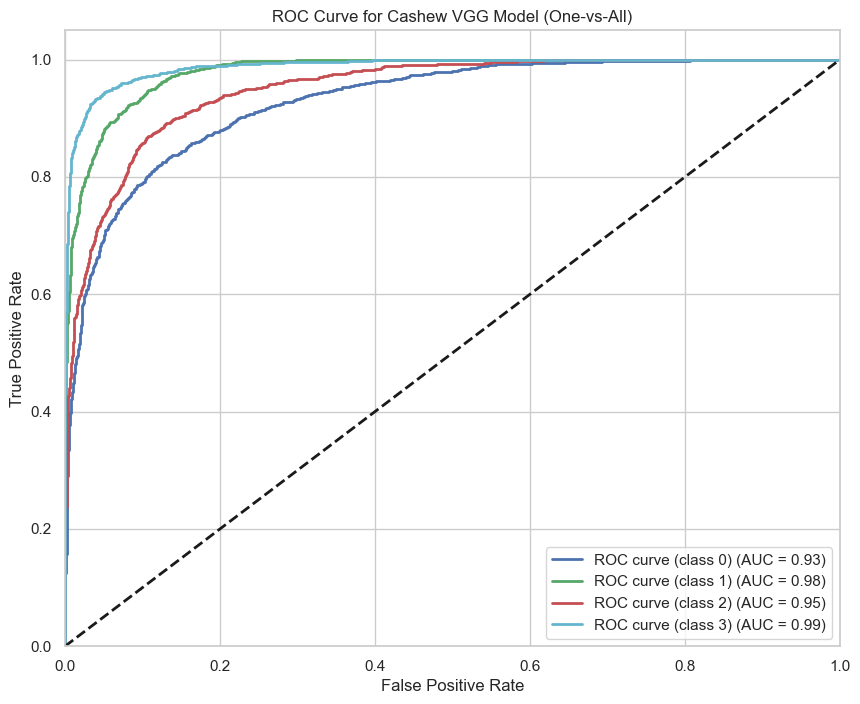

In [35]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr = {}
tpr = {}
roc_auc = {}

num_classes = len(cashew_train_gen.class_indices)

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve((true_labels_cashew == i).astype(int), predictions_cashew[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm'] 

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cashew VGG Model (One-vs-All)')
plt.legend(loc="lower right")
plt.show()
